# LOWPASS FILTER (FREQUENCY DOMAIN)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_path = '/content/drive/MyDrive/Digital-Image-Processing/img4_dog.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

Applying Fourier Transform and shift the zero frequency to the center

In [ ]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

we are using here circular mask but we can shape your filter masks in various geometries, including circular, rectangular, or even more complex custom shapes based on our specific requirements.


  * Circular masks are often used because they treat all directions uniformly. They don't favor horizontal, vertical, or diagonal directions, which makes them a good choice for general-purpose frequency attenuation or enhancement.

  * Rectangular masks can be useful when you want to selectively attenuate or pass frequencies in a non-isotropic manner. For example, if you know that noise or certain features are oriented in a specific direction, you might use a rectangular mask to target those frequencies.

  for rectangular mask:-
```
rows, cols = image.shape
  crow, ccol = rows // 2, cols // 2
  width, height = 60, 70  # Dimensions of the rectangle

  mask = np.zeros((rows, cols), np.uint8)
  mask[crow-height//2:crow+height//2, ccol-width//2:ccol+width//2] = 1
```



circular mask :---

In [ ]:
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
radius = 50
mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, thickness=-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

applying mask and inverse fourier transform -

In [ ]:
fshift = fshift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


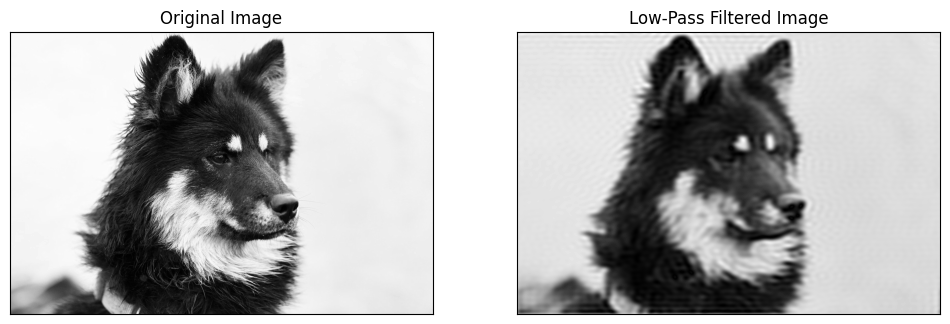

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Low-Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

# BUTTERWORTH FILTER (LOWPASS)

In [ ]:
image_path = '/content/drive/MyDrive/Digital-Image-Processing/img4_dog.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

**Butterworth filter parameters**

In [ ]:
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
cutoff_frequencies = [20, 50, 100]  # Different cutoff frequencies
n = 2  # Order of the filter

In [ ]:
def butterworth_lowpass(cutoff, order, shape):
    x = np.arange(shape[1]) - shape[1] // 2
    y = np.arange(shape[0]) - shape[0] // 2
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H

In [ ]:
filtered_images = []
for D0 in cutoff_frequencies:
    H = butterworth_lowpass(D0, n, (rows, cols))
    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    filtered_images.append(img_back)

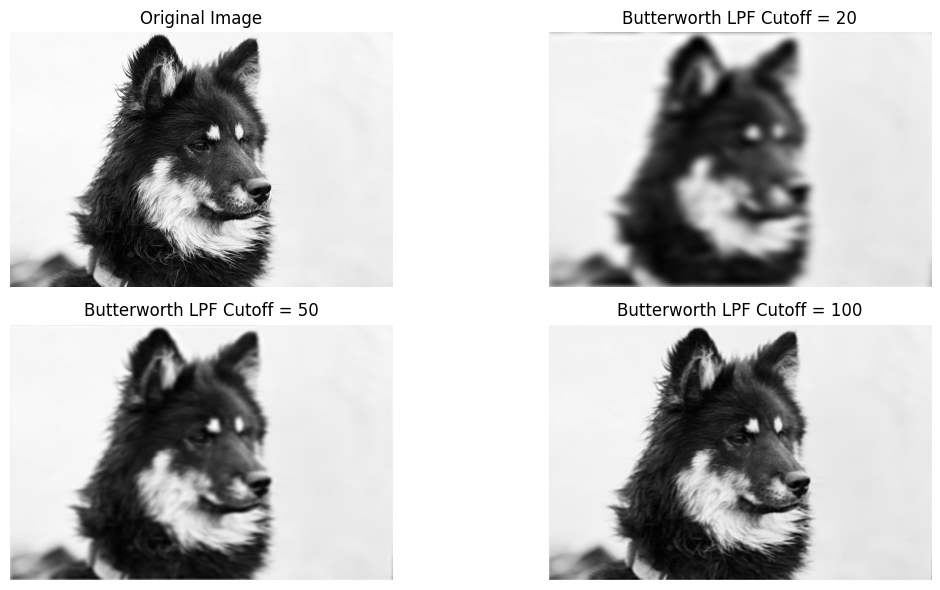

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for index, img in enumerate(filtered_images, start=1):
    plt.subplot(2, 2, index + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Butterworth LPF Cutoff = {cutoff_frequencies[index-1]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# GAUSSIAN FILTER (FREQUENCY DOMAIN)

In [53]:
def gaussian_lowpass(cutoff, shape):
    x = np.arange(shape[1]) - shape[1] // 2
    y = np.arange(shape[0]) - shape[0] // 2
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    H = np.exp(-(D**2) / (2 * (cutoff**2)))
    return H

In [54]:
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
cutoff_frequencies = [20, 50, 100]

In [55]:
filtered_images = []
for D0 in cutoff_frequencies:
    H = gaussian_lowpass(D0, (rows, cols))
    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    filtered_images.append(img_back)


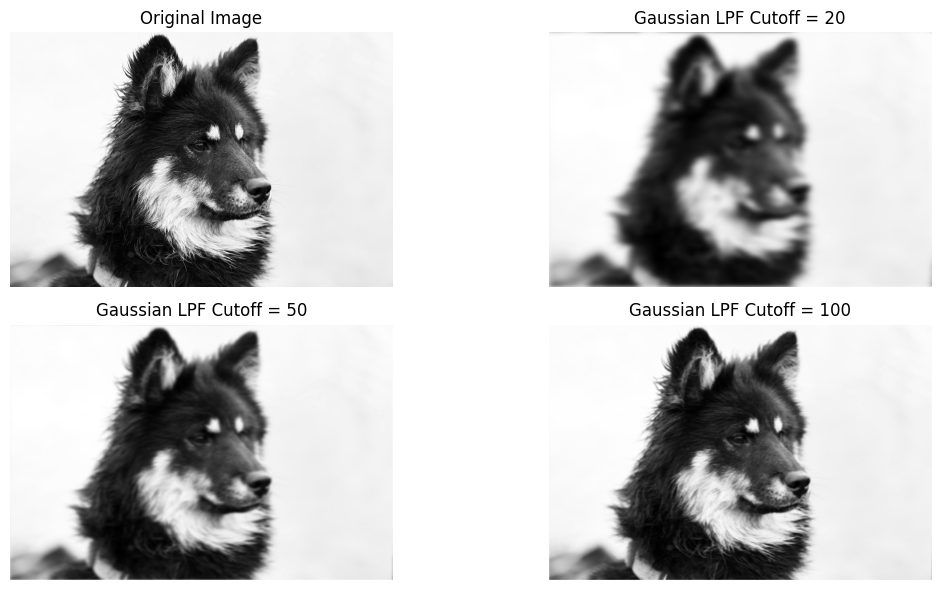

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for index, img in enumerate(filtered_images, start=1):
    plt.subplot(2, 2, index + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Gaussian LPF Cutoff = {cutoff_frequencies[index-1]}')
    plt.axis('off')

plt.tight_layout()
plt.show()